In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import csv

In [2]:
df1 = pd.read_csv('/Users/hmead/Desktop/BW2/General characteristics of people.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')
df2 = pd.read_csv('/Users/hmead/Desktop/BW2/Datos de la vivienda.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')
df3 = pd.read_csv('/Users/hmead/Desktop/BW2/Perception of security and coexistence.csv', sep=';',engine='python', error_bad_lines=False, encoding= 'latin')

In [3]:
general = df1.copy()
housing = df2.copy()
security = df3.copy()

In [4]:
general_columns = {
            'ï»¿DIRECTORIO':'id', 'SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
            'ORDEN':'order', 'P220' : 'sex', 'P5785': 'age', 'P5501':'relationship_to_head_of_household',
            'P6210':'education_level','P1366': 'relationship_status','P1402':'time_lived_in_city',
            'P1403':'time_lived_in_neighborhood','P1365': 'activity','P1364':'activity_location',
            'P1363': 'activity_time_of_day', 'FEX_C': 'gen_expansion'
              }

housing_columns = {
        'ï»¿DIRECTORIO':'id','SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
        'ORDEN':'order', 'P5747': 'dwelling_type','P5752':'electricity_service', 
        'P5752S1':'social_stratum', 'P5090':'housing_status','DEPMUNI':'dept_muni',
        'FEX_C': 'housing_expansion'
          }

security_columns = {
          'ï»¿DIRECTORIO':'id','SECUENCIA_ENCUESTA':'survey_sequence','SECUENCIA_P':'sequence_p',
          'P1362':'general_safe_unsafe', 'P1359':'city_safe_unsafe', 'P1594': 'city_security_inc_dec_same',
          'P564':'will_be_victim_next_12_months', 'P562':'how_unsafe', 'P1356S1': 'activity_location_safe_unsafe', 
          'P1356S2':'public_parks_recreational_sports_spaces', 'P1356S3':'market_squares_shopping_streets', 
          'P1356S4': 'public_transportation', 'P1356S5':'ATMs', 'P1356S6':'public_roads', 'P1356S8':'pedestrian_bridges', 
          'P1356S7':'nightclubs_bars_entertainment_venues', 'P1116':'measures_taken', 'P1353S1':'justify_violence_family', 
          'P1353S2':'justify_violence_punishment', 'P1353S3':'justify_violence_self-defense',
          'P1117':'how_certain_will_be_victim_next_12_months', 
          'P1353S4':'justify_violence_infidelity', 'P1353S5':'justify_violence_defend_stranger', 
          'P1353S6':'justify_violence_defend_property', 'P1115': 'action_taken_as_witness', 'FEX_C': 'sec_expansion'
            }

In [5]:
general = general.rename(columns = general_columns)
housing = housing.rename(columns = housing_columns)
security = security.rename(columns = security_columns)

In [6]:
# Housing dataset only has data from:

   # 'sequence_p' ==1        &
   # 'survey_sequence']==1

# Security dataset only has data from:
   # 'age' >14

condition1 = general['age']>14

condition2_g = general['sequence_p'] ==1
condition3_g = general['survey_sequence']==1

condition2_s = security['sequence_p'] ==1
condition3_s = security['survey_sequence']==1

# Apply conditions, in preparation for horizontal merge

general = general[condition1]
general = general[condition2_g]
general = general[condition3_g]

security = security[condition2_s]
security = security[condition3_s]

# Confirm rows

print(general.shape)
print(housing.shape)
print(security.shape);

(64406, 16)
(64406, 10)
(64406, 49)


<ipython-input-6-67b36480d18c>:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  general = general[condition2_g]
<ipython-input-6-67b36480d18c>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  general = general[condition3_g]
<ipython-input-6-67b36480d18c>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  security = security[condition3_s]


In [7]:
# Drop Columns with lots of NaNs

general_drop_columns = ['P6210S1', 'gen_expansion', 'survey_sequence', 'sequence_p',
                       'activity_location', 'activity_time_of_day', 'relationship_to_head_of_household',]

housing_drop_columns = ['housing_expansion', 'survey_sequence', 'sequence_p']

security_drop_columns = ['how_unsafe','how_certain_will_be_victim_next_12_months',
                         'P1361S1','P1361S2','P1361S3','P1361S4','P1361S5','P1361S6',
                         'P1361S7','P1361S8','P1361S9', 'P563','P1358S1','P1358S10',
                         'P1358S2','P1358S3','P1358S4','P1358S5','P1358S6','P1358S7',
                         'P1361S1', 'P1361S2', 'P1361S3', 'P1361S4', 'survey_sequence',
                         'sequence_p','P1358S8', 'P1358S9', 'P1361S10','P1358S11', 
                          'P1361S10','sec_expansion','ORDEN']

In [8]:
general = general.drop(general_drop_columns, axis=1)

housing = housing.drop(housing_drop_columns, axis=1)

security = security.drop(security_drop_columns, axis=1)

# MERGE INTO DAFAFRAME

In [9]:
# Merge into one dataframe

df = general.merge(housing, on='id').merge(security, on='id')

df.shape

(64406, 35)

In [10]:
# education_level

# def assign_edu(x):
#     for x in df['education_level']:
#         if x == '1':
#             x= 'None'
#         elif x =='2':
#             x= 'Preschool'
#         elif x == '3':
#             x = 'Basic elementary'
#         elif x == '4':
#             x = 'Basic secondary'
#         elif x == '5':
#             x = 'Medium'
#         elif x == '6':
#             x = 'Higher or university'
#         else: x = np.NaN
            
# df.education_level = df.education_level.apply(assign_edu)


In [11]:
# QUESTION 1:

# df.education_level = df.education_level.replace(['1','2','3','4','5','6', '9'], 
#                                                 ['None', 'Preschool', 'Basic elementary', 'Basic secondary', 
#                                                 'Medium', 'Higher or university', np.NaN])

df.education_level = df.education_level.replace('9', np.NaN)

In [12]:
df.head()

,id,order_x,sex,age,education_level,relationship_status,time_lived_in_city,time_lived_in_neighborhood,activity,order_y,...,measures_taken,justify_violence_family,justify_violence_punishment,justify_violence_self-defense,justify_violence_infidelity,justify_violence_defend_stranger,justify_violence_defend_property,action_taken_as_witness,pedestrian_bridges,city_security_inc_dec_same
0,225001,1,1,48,3,2,4,4,1,1,...,5,1,1,1,2,2,1,4,1,3
1,225002,1,1,26,6,6,3,1,1,1,...,1,1,2,1,2,2,2,2,3,3
2,225003,1,2,44,4,4,1,1,1,1,...,3,1,2,1,2,2,2,4,3,3
3,225004,1,1,62,3,3,4,4,1,1,...,3,1,2,1,2,1,2,3,3,3
4,225005,1,1,43,4,3,1,1,1,1,...,5,1,2,1,2,2,2,1,1,3


In [13]:
# relationship_to_head_of_household

In [14]:
df.education_level.isnull().sum()

21

In [15]:
# relationship_status

df.relationship_status = df.relationship_status.replace(['1','2','3','4','5','6'],
                                                ['Not married, lived with partner for less than 2 years',
                                                 'Not married, lived with a partner for more than 2 years',
                                                 'Married',
                                                 'Widower',
                                                 'Separated or divorced',
                                                 'Single',])

In [16]:
# activity

df.activity = df.activity.replace(['1','2','3','4','5','6','7','8'],
                                    ['Working',
                                    'Looking for work',
                                    'Studying',
                                    'Household duties ',
                                    'Permanently incapable of working',
                                    'Retired',
                                    'Leisure',
                                     np.NaN])

In [17]:
df.activity.value_counts()

Working                             42119
Household duties                    11646
Retired                              5132
Looking for work                     1692
Leisure                              1236
Studying                             1134
Permanently incapable of working     1003
Name: activity, dtype: int64

In [18]:
# dwelling_type

df.dwelling_type = df.dwelling_type.replace([1,2,3,4], 
                                            ['House', 'Apartment', 'Room', 'Other'])

In [19]:
# own_rent_usufruct_other

df['housing_status'] = df.housing_status.replace([1,2,3,4],
                                                 ['Owned', 'Leased', 'In usufruct', 'Other'])

In [20]:
# dept_muni

df.dept_muni = df.dept_muni.replace([5001, 
                                     8001,
                                     8758,
                                     11001,
                                     13001,
                                     15001,
                                     17001,
                                     19001,
                                     20001,
                                     23001,
                                     25754,
                                     27001,
                                     41001,
                                     44001,
                                     47001,
                                     50001,
                                     52001,
                                     54001,
                                     63001,
                                     66001,
                                     68001,
                                     70001,
                                     73001,
                                     76001,
                                     76109,
                                     76520,
                                     76834,
                                     88001], ['Medellín',
                                    'Barranquilla',
                                    'Soledad',
                                    'Bogotá DC',
                                    'Cartagena',
                                    'Tunja',
                                    'Manizales',
                                    'Popayán',
                                    'Valledupar',
                                    'Montería',
                                    'Soacha',
                                    'Quibdó',
                                    'Neiva',
                                    'Riohacha',
                                    'Santa Marta',
                                    'Villavicencio',
                                    'Pasto',
                                    'Cúcuta',
                                    'Armenia',
                                    'Pereira',
                                    'Bucaramanga',
                                    'Sincelejo',
                                    'Ibagué',
                                    'Cali',
                                    'Buenaventura',
                                    'Palmira',
                                    'Tuluá',
                                    'San Andrés'])

In [21]:
for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(col,axis=1)
df.shape

(64406, 33)

In [22]:
import numpy as np

df = df.replace(' ', np.NaN)

In [23]:
df = df.drop(['id'], axis=1)

In [24]:
df.shape

(64406, 32)

In [25]:
df = df.dropna()

In [26]:
df.shape

(63657, 32)

In [27]:
objects = df.select_dtypes('object').columns.tolist()

In [28]:
df.columns

Index(['sex', 'age', 'education_level', 'relationship_status',
       'time_lived_in_city', 'time_lived_in_neighborhood', 'activity',
       'dwelling_type', 'electricity_service', 'social_stratum',
       'housing_status', 'dept_muni', 'general_safe_unsafe',
       'city_safe_unsafe', 'will_be_victim_next_12_months',
       'activity_location_safe_unsafe',
       'public_parks_recreational_sports_spaces',
       'market_squares_shopping_streets', 'public_transportation', 'ATMs',
       'public_roads', 'nightclubs_bars_entertainment_venues',
       'measures_taken', 'justify_violence_family',
       'justify_violence_punishment', 'justify_violence_self-defense',
       'justify_violence_infidelity', 'justify_violence_defend_stranger',
       'justify_violence_defend_property', 'action_taken_as_witness',
       'pedestrian_bridges', 'city_security_inc_dec_same'],
      dtype='object')

In [29]:
column_list = df.nunique().index.tolist()

In [30]:
column_list

['sex',
 'age',
 'education_level',
 'relationship_status',
 'time_lived_in_city',
 'time_lived_in_neighborhood',
 'activity',
 'dwelling_type',
 'electricity_service',
 'social_stratum',
 'housing_status',
 'dept_muni',
 'general_safe_unsafe',
 'city_safe_unsafe',
 'will_be_victim_next_12_months',
 'activity_location_safe_unsafe',
 'public_parks_recreational_sports_spaces',
 'market_squares_shopping_streets',
 'public_transportation',
 'ATMs',
 'public_roads',
 'nightclubs_bars_entertainment_venues',
 'measures_taken',
 'justify_violence_family',
 'justify_violence_punishment',
 'justify_violence_self-defense',
 'justify_violence_infidelity',
 'justify_violence_defend_stranger',
 'justify_violence_defend_property',
 'action_taken_as_witness',
 'pedestrian_bridges',
 'city_security_inc_dec_same']

# Build Model

In [31]:
target = column_list[12]
leakage = column_list[12:22]+['city_security_inc_dec_same']

In [32]:
print('Baseline Accuracy:',str(round(df[target].value_counts(normalize=True).max()*100,2))+ '%')

Baseline Accuracy: 71.33%


In [33]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size=0.85, test_size=0.15, 
                              stratify=df['general_safe_unsafe'], random_state=42)

train, val = train_test_split(train, train_size=0.85, test_size=0.15, 
                              stratify=train['general_safe_unsafe'], random_state=42)

In [34]:
print(train.shape)
print(val.shape)
print(test.shape)

(45991, 32)
(8117, 32)
(9549, 32)


In [35]:
y_train = train[target]
y_val = val[target]
y_test = test[target]

X_train = train.drop(train[leakage], axis=1)
X_val = val.drop(val[leakage], axis=1)
X_test = test.drop(test[leakage], axis=1)

print(y_train.shape)
print(X_train.shape)

print(y_val.shape)
print(X_val.shape)

print(y_test.shape)
print(X_test.shape)

(45991,)
(45991, 21)
(8117,)
(8117, 21)
(9549,)
(9549, 21)


In [68]:
objects = objects[1:]
objects

['relationship_status',
 'time_lived_in_city',
 'time_lived_in_neighborhood',
 'activity',
 'dwelling_type',
 'social_stratum',
 'housing_status',
 'dept_muni']

In [42]:
!pip install category_encoders

  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)


In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    OneHotEncoder(cols=objects), 
    RandomForestClassifier(max_depth=16, n_estimators=156,random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train, y_train)

print('Validation Accuracy', pipeline.score(X_val, y_val))
print('\nTest Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.7380805716397684

Test Accuracy 0.7380877578804064


In [66]:
model = LogisticRegression(max_iter=2000).fit(X_train_transformed, y_train)

In [67]:
model.score(X_val_transformed, y_val)

0.7300726869533078

In [214]:
from sklearn.model_selection import GridSearchCV

In [232]:
params = {'n_estimators': range(152,161,2),
          'max_depth': range(10,18,2)}

model.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [233]:
gs = GridSearchCV(model, param_grid = params, n_jobs =-1, verbose=1, cv=3)

In [234]:
gs.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   40.8s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': range(10, 18, 2),
                         'n_estimators': range(152, 161, 2)},
             verbose=1)

In [235]:
gs.best_params_

{'max_depth': 16, 'n_estimators': 156}

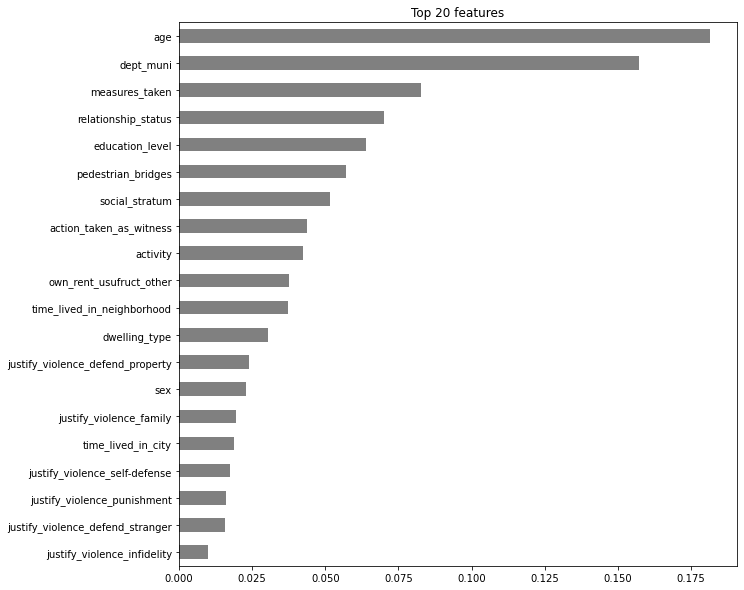

In [198]:
# Get feature importances

importances = pd.Series(model.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

n = 20
plt.figure(figsize=(10,n/2))
plt.title(f'Top {n} features')
importances.sort_values()[-n:].plot.barh(color='grey');

# Alternate Target: Sex

In [98]:
target2 = 'age'

y_train2 = train[target2]
y_val2 = val[target2]
y_test2 = test[target2]

X_train2 = train.drop(target2, axis=1)
X_val2 = val.drop(target2, axis=1)
X_test2 = test.drop(target2, axis=1)

print(y_train2.shape)
print(X_train2.shape)

print(y_val2.shape)
print(X_val2.shape)

print(y_test2.shape)
print(X_test2.shape)

(45991,)
(45991, 31)
(8117,)
(8117, 31)
(9549,)
(9549, 31)


In [99]:
# noncat 
print('Baseline Accuracy:',str(round(df[target2].mean(),0)))
# cat print('Baseline Accuracy:',str(round(df[target2].value_counts(normalize=True).max()*100,2))+ '%')

Baseline Accuracy: 49.0


1    0.55444
2    0.44556
Name: sex, dtype: float64

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    OneHotEncoder(cols=objects), 
    RandomForestRegressor(max_depth=16, n_estimators=156,random_state=42, n_jobs=-1)
)

# Fit on train, score on val
pipeline.fit(X_train2, y_train2)

print('Validation Accuracy', pipeline.score(X_val2, y_val2))
print('\nTest Accuracy', pipeline.score(X_test2, y_test2))

Validation Accuracy 0.5893263634839199

Test Accuracy 0.604293573055284


In [ ]:
model = LogisticRegression(max_iter=2000).fit(X_train2, y_train)